# WITH PANDAS AND MATPLOTLIB

In [101]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [5]:
kill = pd.read_csv("plckilling.csv", encoding="windows-1252")
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 1: Plot number of people by gender

In [6]:
kill.count()

id                         2535
name                       2535
date                       2535
manner_of_death            2535
armed                      2526
age                        2458
gender                     2535
race                       2340
city                       2535
state                      2535
signs_of_mental_illness    2535
threat_level               2535
flee                       2470
body_camera                2535
dtype: int64

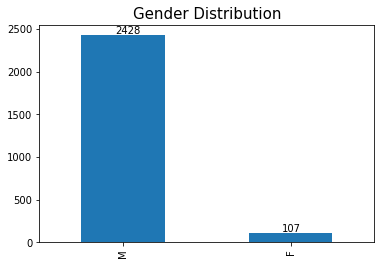

In [14]:
# with matplotlib
fig, ax = plt.subplots()
kill.gender.value_counts().plot(kind='bar', ax=ax)
# ax.bar(kill.gender.value_counts())
# or
# ax = kill.gender.value_counts().plot(kind='bar')
ax.set_title("Gender Distribution", fontsize=15)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

## 2: Plot 7 most common kill weapons

In [19]:
most_used = kill.armed.value_counts().head(7)
most_used

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

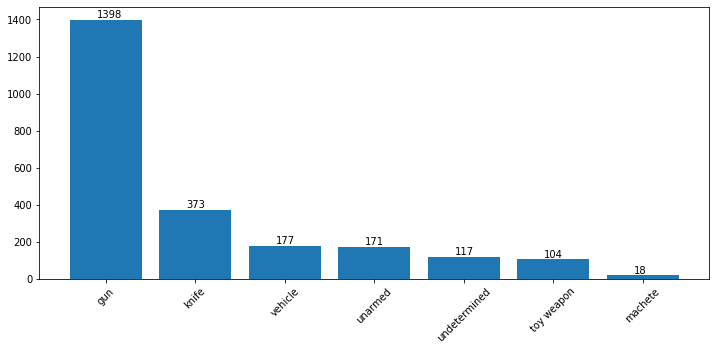

In [39]:
# with matplotlib
fig,ax = plt.subplots(figsize=(12,5))
ax.bar(most_used.index,height=most_used.values)
ax.set_xticklabels(most_used.index, rotation=45)

for i in ax.patches:
    ax.annotate(i.get_height(),((i.get_x()+0.3, i.get_height()+10)))

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [40]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [41]:
kill["age_cat"]= kill["age"].apply(lambda x : "above25" if x > 25 else "below25")
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [44]:
kill.age_cat.value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

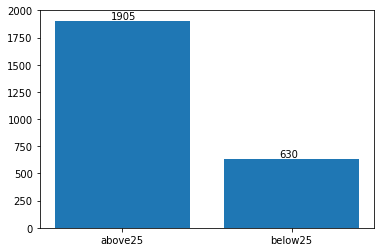

In [51]:
# with matplotlib
fig,ax=plt.subplots()

ax.bar(kill.age_cat.value_counts().index,kill.age_cat.value_counts().values)

for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+0.33,i.get_height()+15))

## 4: Plot number of killed poeple by race

In [65]:
stat_race = kill.race.value_counts(dropna=False)
stat_race

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

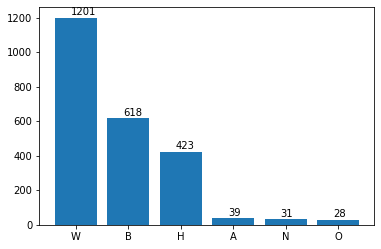

In [60]:
# with matplotlib
fig,ax=plt.subplots()
ax.bar(stat_race.index,stat_race.values)

for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+0.3,i.get_height()+15))

## 5: Killed People According to Races (Pie Chart)

In [61]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [63]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [64]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [71]:
kill.dropna(inplace=True)
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [72]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [79]:
ind = kill.race.value_counts().index
ind

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [81]:
val = kill.race.value_counts().values
val

array([1168,  592,  401,   36,   29,   28], dtype=int64)

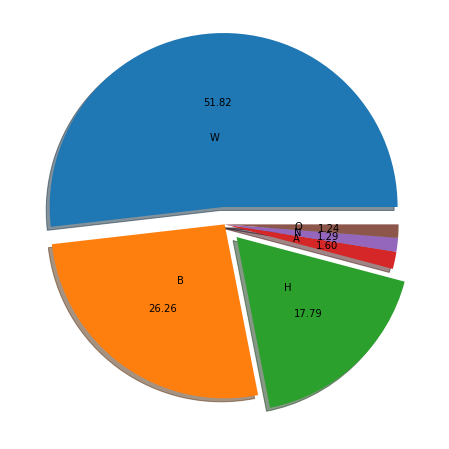

In [100]:
# matplotlib

explode = [0.1, 0, 0.1, 0 , 0, 0]
fig,ax = plt.subplots(figsize=(13,8))
plt.pie(x=val,labels = ind, explode=explode, labeldistance = 0.4, autopct="%.2f", shadow=True)
plt.show()